In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/Face Detection

/content/drive/MyDrive/Colab Notebooks/Face Detection


In [3]:
# Import required libraries
from PIL import Image
import os
import re
from skimage.feature import hog
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import pickle as pk
import joblib

In [16]:
# Define target names
target_names = ['AamirKhan', 'JayaBadhuri', 'HritikRoshan', 'AnupamKher']

# Load and preprocess the image
# Uncomment one of the examples below to test with different images
# img = Image.open('a2_NewPhotos/Amir_21.jpg')
img = Image.open('a2_NewPhotos/HirtikRoshan_237.jpg')
# img = Image.open('a2_NewPhotos/AmitabhBachan_34.jpg')
# img = Image.open('a2_NewPhotos/AnupamKher_11.jpg')      # misclassification
# img = Image.open('a2_NewPhotos/JayaBhaduri_24.jpg')

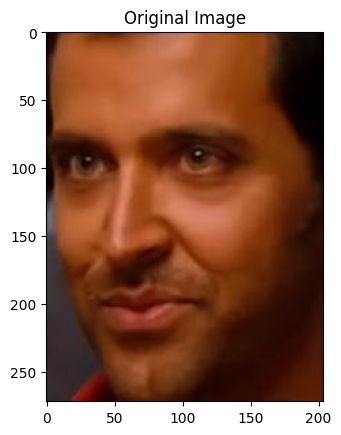

In [17]:
# Display the original image
plt.imshow(img)
plt.title("Original Image")
plt.show()

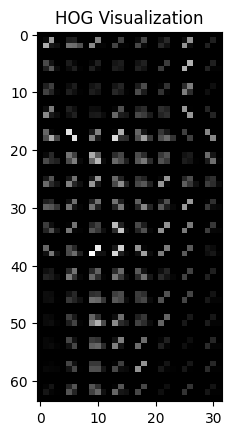

In [18]:
# Resize and convert the image to grayscale
img = img.resize([32, 64])
img = img.convert('L')

# Extract HOG features
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True, channel_axis=None)

# Display the HOG visualization
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Visualization")
plt.show()

In [19]:
# Prepare the feature vector
X = fd.reshape(1, -1)  # Reshape the feature vector to match model input

In [20]:
# Load the PCA model
pca = pk.load(open("pca.pkl", 'rb'))
X_test_pca = pca.transform(X)

# Load the trained SVM classifier
clf = joblib.load('c2_FR_svm_classifier.pkl')

In [21]:
# Define the confidence threshold
threshold = 0.6

# Predict the class of the image
probabilities = clf.predict_proba(X_test_pca)
max_prob = probabilities.max()
if max_prob >= threshold:
    y_pred = target_names[probabilities.argmax()]
else:
    y_pred = 'Unidentified'

In [22]:
# Output the result
print(f"Identified as {y_pred} with confidence {round(max_prob * 100)}%")

Identified as HritikRoshan with confidence 96%
